**Read in People Master table**

In [140]:
#Read in master table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline
people_master = pd.read_csv('data/People_Master.csv')
people_master = people_master.drop(columns='Unnamed: 0')
people_master.head()

,Title_ID,Title,Year,Runtime_Minutes,Genres,Lifetime_Gross,Name_ID,Role,Name
0,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",652270625.0,nm0189777,producer,Patrick Crowley
1,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",652270625.0,nm0695435,actor,Chris Pratt
2,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",652270625.0,nm0397171,actress,Bryce Dallas Howard
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",652270625.0,nm1339223,actor,Ty Simpkins
4,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",652270625.0,nm0339460,actress,Judy Greer


In [141]:
people_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30722 entries, 0 to 30721
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title_ID         30722 non-null  object 
 1   Title            30722 non-null  object 
 2   Year             30722 non-null  int64  
 3   Runtime_Minutes  30495 non-null  float64
 4   Genres           30687 non-null  object 
 5   Lifetime_Gross   30722 non-null  float64
 6   Name_ID          30722 non-null  object 
 7   Role             30722 non-null  object 
 8   Name             30722 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.1+ MB


In [142]:
#We have at least 1 person for ~all movies in the Master_Table.csv
people_master.nunique()

Title_ID            3187
Title               3144
Year                  10
Runtime_Minutes      122
Genres               347
Lifetime_Gross      3111
Name_ID            19741
Role                  12
Name               19660
dtype: int64

**Create DF For Each Role**

In [143]:
# #Create df for each role
# #Want people who consistently deliver good results, so filter for people with >=3 credits in a given role

# #3,817 Actors
# #607 Actors with at least 3 credits

# #2,538 Directors
# #193 Directors with at least 3 credits

# #3,357 Writers
# #252 writers with at least 3 credits

# #1,117 Cinematographers
# #67 with at least 3 credits

In [144]:
#define function to get top 10 people in a certain role
def get_top_ten(role):
    """Purpose: Create list of the top 10 people in a certain role in terms of revenue.
    
    Input: Input a string corresponding to a role.
    
    Output: Outputs a list of names.  Names are people associated w/ >= 3 movies.  Names are ranked by median revenue generated by their movies.
    """
    filter_df = people_master.loc[(people_master['Role'] == role)]
    filter_df = filter_df.groupby('Name').filter(lambda x: len(x) >= 3).reset_index()
    top_df = filter_df.groupby('Name').median().sort_values(by='Lifetime_Gross', ascending=False)
    top_df = top_df[['Lifetime_Gross']]
    
    return list(top_df.head(10).index)

In [145]:
#define function to get all movie data for people in top 10 lists
def get_top_ten_data(top_ten_list):
    """Purpose: Filter people_master data to only show rows w/ a top 10 actor/director/etc.
    
    Input: List of people.  Output from get_top_ten.
    
    Output: Filtered version of people_master.
    """
    return people_master[people_master['Name'].isin(top_ten_list)]

In [146]:
#Get Data for top 10 Actors, Directors, Writers, and Cinematographers
top_actors = get_top_ten('actor')
top_actors_data = get_top_ten_data(top_actors)

top_writers = get_top_ten('writer')
top_writers_data = get_top_ten_data(top_writers)

top_directors = get_top_ten('director')
top_directors_data = get_top_ten_data(top_directors)

top_cin = get_top_ten('cinematographer')
top_cin_data = get_top_ten_data(top_cin)

**Easier to Graph using below data**

In [147]:
#Define Function to Get median revenue for Top Actors/Directors/etc
def median_revenue(role):
    filter_df = people_master.loc[(people_master['Role'] == role)]
    filter_df = filter_df.groupby('Name').filter(lambda x: len(x) >= 3).reset_index()
    top_df = filter_df.groupby('Name').median().sort_values(by='Lifetime_Gross', ascending=False)
    return top_df[['Lifetime_Gross']].head(10)


In [148]:
#Get Median Rev DFs for each role
median_act = median_revenue('actor')
median_dir = median_revenue('director')
median_cin = median_revenue('cinematographer')
median_wri = median_revenue('writer')

In [ ]:

# sns.set_style('whitegrid')
# actors_ax = sns.barplot(x= median_act.index, y=median_act['Lifetime_Gross'], data = median_act, palette='Blues_d').set(xlabel = 'Actors', ylabel = 'Gross Revenue', title = 'Top 10 Actors by Gross Revenue')
# plt.xticks(rotation=45)

In [187]:
#Output formatted Graphs
def graph_top_roles(top_roles_data, role, color_palette):
    """Purpose: 
    Create formatted seaborn graph based on top 10 median revenue dataframes.
    
    Input: 
    top_roles_data == dataframe ('median_act' for example)
    role == String choosing which role you want to analyze ('actor', 'director', etc.)
    color_palette = seaborn palette name as a string.
    
    """
    #Set style, font size, figure size
    sns.set_style('whitegrid')
    sns.set_context("paper", font_scale=2) 
    fig, ax = plt.subplots(figsize=(10, 7))
    
    #Format y axis for millions of dollars
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.0f}'.format(x/1000000) + 'M'))
    
    #Create graph and format labels
    g = sns.barplot(x= top_roles_data.index, y=top_roles_data['Lifetime_Gross'], data = top_roles_data, palette=color_palette).set(xlabel = (role.title()+'s'), ylabel = 'Gross Revenue', title = 'Top 10 '+ role.title() + 's' + ' by Gross Revenue')
    plt.xticks(rotation=52)

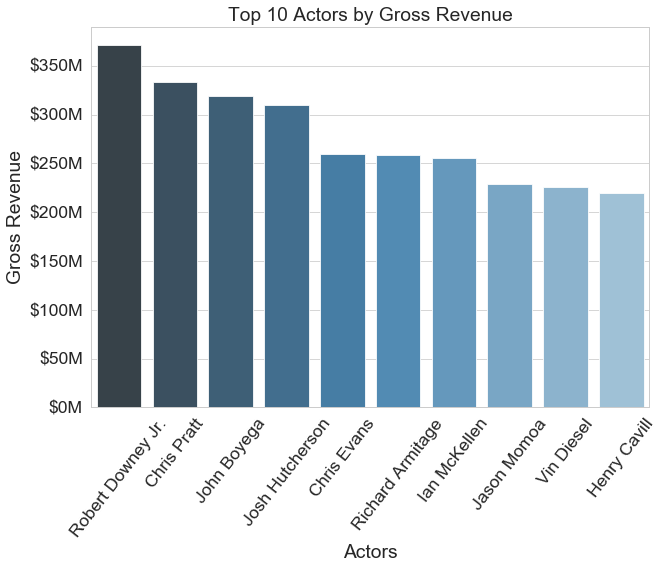

In [188]:
#Top actors graph
graph_top_roles(median_act, 'actor', 'Blues_d')

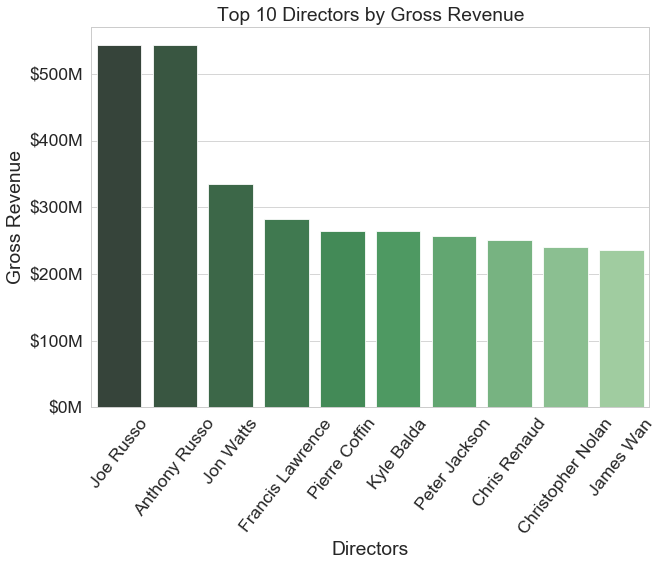

In [189]:
#Top directors graph
graph_top_roles(median_dir, 'director', 'Greens_d')

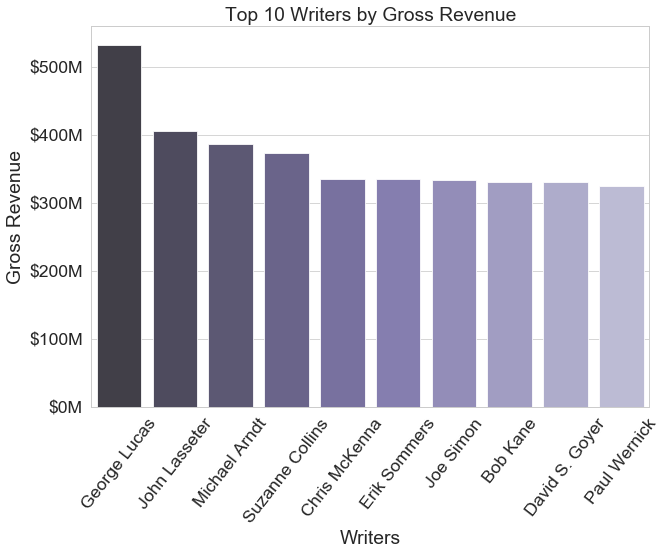

In [190]:
#Top writers graph
graph_top_roles(median_wri, 'writer', 'Purples_d')

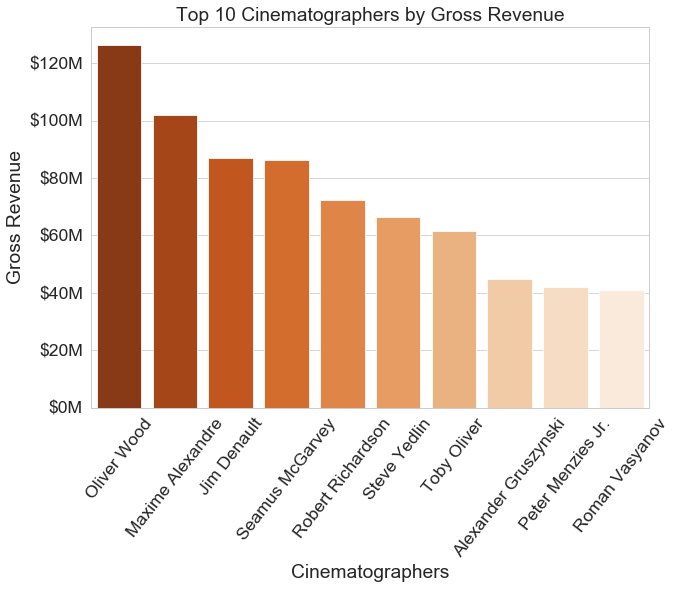

In [191]:
#Top cinematographers graph
graph_top_roles(median_cin, 'cinematographer', 'Oranges_r')